<a href="https://colab.research.google.com/github/presleyyyy/Presley-data-science/blob/main/Supervised_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What You're Aiming For

In this checkpoint, we are going to work on the 'Systemic Crisis, Banking Crisis, inflation Crisis In Africa' dataset that was provided by Kaggle.

Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

 ➡️ Dataset link

https://i.imgur.com/3XzFz3x.jpg


Instructions

1. Import you data and perform basic data exploration phase                    ..Display general information about the dataset
 ..Create a pandas profiling reports to gain insights into the dataset
 ..Handle Missing and corrupted values
 ..Remove duplicates, if they exist
 ..Handle outliers, if they exist
 ..Encode categorical features
2. Select your target variable and the features
3.Split your dataset to training and test sets
4. Based on your data exploration phase select a ML classification algorithm and train it on the training set
5. Assess your model performance on the test set using relevant evaluation metrics
6. Discuss with your cohort alternative ways to improve your model performance



### **Load data**

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
!pip install ydata-profiling

In [ ]:
df = pd.read_csv('/content/African_crises_dataset.csv')
df

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [ ]:
Profile = ProfileReport(df, title="Ydata_Profiling Report", explorative=True)

In [ ]:
Profile.to_file('/content/African_crises_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:375: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)
duplicate_values = df.duplicated().sum()
print(duplicate_values)

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64
0


In [ ]:
#dropping duplicates
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates.head())

   country_number country_code  country  year  systemic_crisis  exch_usd  \
0               1          DZA  Algeria  1870                1  0.052264   
1               1          DZA  Algeria  1871                0  0.052798   
2               1          DZA  Algeria  1872                0  0.052274   
3               1          DZA  Algeria  1873                0  0.051680   
4               1          DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0  

In [ ]:
df.dropna(axis = 0, how ='any')

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [ ]:
from scipy import stats
import numpy as np

#df1 = df[(np.abs(stats.zscore(df['systemic_crisis'])) < 3)]
df2 = df[(np.abs(stats.zscore(df['inflation_crises'])) < 3)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [ ]:
(np.abs(stats.zscore(df['systemic_crisis'])))

0       3.451758
1       0.289707
2       0.289707
3       0.289707
4       0.289707
          ...   
1054    3.451758
1055    0.289707
1056    0.289707
1057    0.289707
1058    0.289707
Name: systemic_crisis, Length: 1059, dtype: float64

In [ ]:
df2['banking_crisis'] = label_encoder.fit_transform(df2['banking_crisis'])

In [ ]:
df2

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,0
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,1
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,1
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,1


In [ ]:
target_variable = ['systemic_crisis']
features_variable = ['banking_crisis', 'inflation_crises']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
x= df2[features_variable]
y= df2[target_variable]

In [ ]:
#features extraction
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)


In [ ]:
x_test

,banking_crisis,inflation_crises
418,0,0
202,0,0
682,1,0
316,1,0
267,1,0
...,...,...
1021,1,0
527,1,0
985,1,0
966,1,0


In [ ]:
x_train

,banking_crisis,inflation_crises
661,1,0
37,1,0
969,1,0
158,1,0
40,1,0
...,...,...
1033,1,0
763,1,0
835,1,0
559,1,0


In [ ]:
y_train

,systemic_crisis
661,0
37,0
969,0
158,0
40,0
...,...
1033,0
763,0
835,0
559,0


In [ ]:
y_test

,systemic_crisis
418,0
202,1
682,0
316,0
267,0
...,...
1021,0
527,0
985,0
966,0


In [ ]:
x= df2[features_variable]
y= df2[target_variable]

#splitting data with test size of 25%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.97


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


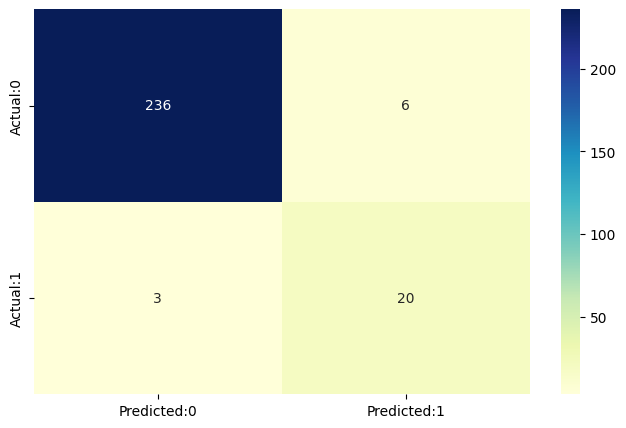

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()